# Exercise Sheet No. 1

---

> Machine Learning for Natural Sciences, Summer 2022, Jun.-Prof. Pascal Friederich, pascal.friederich@kit.edu
>
> Container version: 1.0.0

---

**Topic**: This exercise sheet will not be graded and serves as an
introduction  to explain the online exercise regulations and to help you to
familiarize yourself with Python, Jupyter and Numpy. The exercises in this
sheet are meant as an appetizer to show you what future exercises could cover.

## Preliminaries
If you are not familiar with Python, you may want to learn more about Python
and its basic syntax. Since there are a lof of free and well written tutorials
 online, we refer you to one of the following online tutorials:

* http://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
* https://www.learnpython.org/
* https://www.w3schools.com/python/
* https://automatetheboringstuff.com/

## 1.1 Corona (not graded)

*Disclaimer*: If you are in any way personally affected by the Corona crisis,
you do not have to participate in this exercise. It will not be graded or is
necessary for the progress of this course.

To get to know Python's data science workflows, we briefly analyze the
current  corona epidemic. First download a historical dataset on the corona
infections worldwide from the European Centre for Disease Prevention and
Control in 2020 ([link](https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx)).
We can do this in Python via the ``requests`` package.

In [1]:
import os
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import scipy.optimize
from sklearn.neural_network import MLPRegressor

In [2]:
data_url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"
data_file = "COVID-19-geographic-disbtribution-worldwide.xlsx"
if not os.path.exists(data_file):
    print("Downloading dataset ...")
    with open(data_file, "wb") as f:
        f.write(requests.get(data_url).content)
    print("Downloading dataset done.")

Now, we load the dataset via the data library ``pandas``, which will return a ``DataFrame`` object. We print the head of the table with ``.head()``:

In [3]:
corona_world = pd.read_excel(data_file)
corona_world.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


The ``DataFrame`` allows access via index and columns.
Basic Python operators ``[]`` and ``.`` are supported.
**Warning**: Whether a copy or a reference is returned for a setting operation,
 may depend on the context.

In [4]:
print(corona_world.index)
print(corona_world.columns)

RangeIndex(start=0, stop=61900, step=1)
Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')


Now we will select a column, namely ``corona_world["countriesAndTerritories"]``
and then select the indices where  we find ``"Germany"`` via ``corona_countries=="Germany"``
not by numbers but by a boolean array. We can also do multi-indexing via a list
``[["dateRep", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]]``.
The values for the sub-frame ``corona_germany`` is obtained by either ``.values``
or ``.to_numpy``. Note that usually you will use a pandas ``DataFrame`` by the
operators ``.iloc`` and ``.loc`` for index- and name-wise access of a group of
rows and columns. They furthermore enable slicing. For convenience, we flip
the final data so that they start from the past going forward.

In [5]:
# Select data
corona_countries = corona_world["countriesAndTerritories"]
corona_germany = corona_world[corona_countries == "Germany"]
corona_germany = corona_germany[[
    "dateRep", "cases", "deaths",
    "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"
]]
time_germany = corona_germany["dateRep"].values
cc_germany = corona_germany[
    "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"
].to_numpy()
time_germany = np.flip(time_germany)
cc_germany = np.flip(cc_germany)

To visualize the data, we exemplary plot the number of 14 days cumulative
cases as a function of time for Germany. For this purpose we use
``matplotlib.pyplot`` plotting tool. You can find a nice user guide with
examples [here](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).
We will use ``matplotlib`` very often in the next exercises.

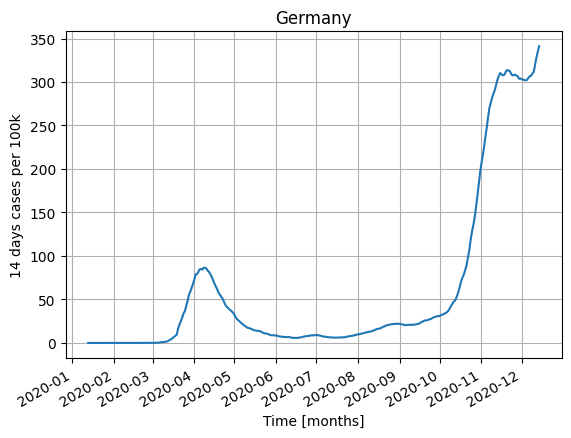

In [6]:
# Date functionality
months = mdates.MonthLocator()  # every month
# Make plot
fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.title("Germany")
plt.ylabel("14 days cases per 100k")
plt.xlabel("Time [months]")
plt.show()

Now it's time for you to answer the following questions, while using either
pandas dataframes or convert to numpy and Python objects. Wherever possible,
built-in functionality of libraries such as `Numpy`, `Pandas`,`TensorFlow`
or `PyTorch` should be preferred over Python statements as these libraries
are heavily optimized and run much faster than raw Python code in general.
Have a look at the documentation of [numpy] (https://numpy.org/doc/) and
[pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
if you want to know more. We will work with [numpy](https://numpy.org/doc/)
methods in the next exercises in more detail.

**1.1.1** List the number of the deceased in connection with Covid-19
relative to the population for each country for 2020. What can you say
about the mortality rate? Which country has the highest and which has
the lowest mortality rate? To do this you first have to obtain the information
of population per country for example in a python ``dict``. You may want to use
the following pandas methods (if you don't know them, look them up
at [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)):
``.unique``, ``.groupby``, ``.mean``, ``.sum``, ``.sort_values``, ``.get_group`` and ``.from_dict``:

In [7]:
countries = []
population = {}
deaths = {}
rel_deaths = {}
country_max_mortality = ""
countries = corona_world["countriesAndTerritories"].unique()
population = corona_world.groupby("countriesAndTerritories")["popData2019"].mean()
deaths = corona_world.groupby("countriesAndTerritories")["deaths"].sum()
rel_deaths = (deaths / population) * 100000
rel_deaths = rel_deaths.fillna(0)
country_max_mortality = rel_deaths.sort_values().index[-1]
population = population.to_dict()
rel_deaths = rel_deaths.to_dict()
deaths = deaths.to_dict()

**1.1.2** Plot the cumulative number of cases, deceased and number of recovered
patients for Germany. Make sure that the data has the correct order for a
cumulative sum. You can either again write your own function or simply use
``np.cumsum`` to compute the cumulative sum of the number of cases and deaths
in Germany.

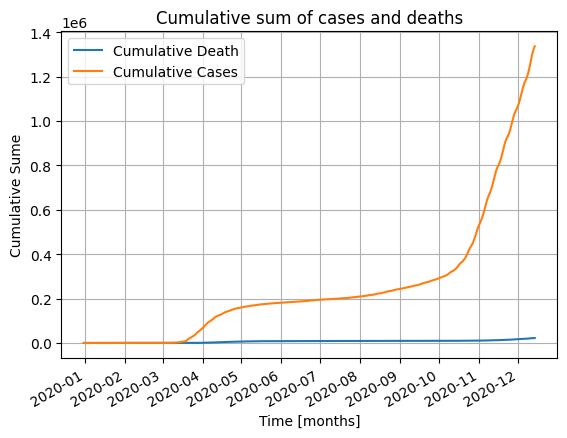

In [8]:
cum_death = np.array([])
cum_cases = np.array([])
corona_germany = corona_germany.sort_values(by=['dateRep']).reset_index(drop=True)
dates = corona_germany['dateRep'].to_numpy()
cum_death = np.cumsum(corona_germany['deaths'])
cum_cases = np.cumsum(corona_germany['cases'])
fig, ax = plt.subplots()  # generate a new plot
ax.plot(dates, cum_death, label="Cumulative Death")  # plot data
ax.plot(dates, cum_cases, label="Cumulative Cases")  # plot data

cum_death = cum_death.to_numpy()
cum_cases = cum_cases.to_numpy()

ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.legend()
plt.title("Cumulative sum of cases and deaths")
plt.ylabel("Cumulative Sume")
plt.xlabel("Time [months]")
plt.show()  # make plot


There has been a discussion in Germany whether the 'second wave' of infections
in the end of 2020 was underestimated by many political leaders. The chancellor
of Germany, Angela Merkel and her team, warned the ministers and the public of
a dire development in the beginning of october. In fact, the large increase of
infections before Christmas turned out to be very serious, even with
counter-measures. We want to see in the next task, if we can correctly predict
the development.

**1.1.3** First we select the data from the plot above between 01.08.2020
and 01.10.2020. Note that we are using numpy arrays with number type ``dtype="datetime64[ns]"``. We can use the package ``datetime`` and its class ``datetime`` for human-readable dates, that can be freely converted into strings, seconds or via ``np.datetime64()`` into numpy's ``dtype="datetime64[ns]"``. We have to select the correct time-period and divide by the delta of ``np.timedelta64(1,"D")`` that corresponds to one day. Finally, we end up with an array counting the days with from 01.08.2020 onwards.

In [9]:
# Select dates
date_start = datetime(2020, 8, 1)
date_stop = datetime(2020, 10, 1)
selection = np.logical_and(time_germany >= np.datetime64(date_start),
                           time_germany < np.datetime64(date_stop))

date_start_14 = datetime(2020, 9, 17)
date_stop_14 = datetime(2020, 10, 1)
selection_14 = np.logical_and(time_germany >= np.datetime64(date_start_14),
                           time_germany < np.datetime64(date_stop_14))

# Select training data
x_cases = np.array(time_germany[selection] - np.datetime64(date_start)) / np.timedelta64(1, "D")
y_cases = np.array(cc_germany)[selection]
x_test = time_germany[time_germany >= np.datetime64(date_start)]
x_test_days = (x_test - np.datetime64(date_start)) / np.timedelta64(1, "D")

x_cases_14 = np.array(time_germany[selection_14] - np.datetime64(date_start_14)) / np.timedelta64(1, "D")
y_cases_14 = np.array(cc_germany)[selection_14]
x_test_14 = time_germany[time_germany >= np.datetime64(date_start_14)]
x_test_days_14 = (x_test_14 - np.datetime64(date_start_14)) / np.timedelta64(1, "D")

In [10]:
y_cases_14

array([23.71860596, 24.27630818, 25.38328086, 25.8133018 , 25.94339216,
       26.33125419, 27.04554667, 27.34788633, 28.15372389, 29.21010586,
       29.76660355, 30.08580676, 30.90730335, 30.78323568])

Try to fit the data with analytical expressions using for example
``scipy.optimize.curve_fit``. If the fit does not work, try setting bounds
and initial guesses. Try the following relations, with some initial guess for
the free parameters $(a,b,\dots)$. First implement the functions in Python
with the help of ``numpy`` or ``scipy`` methods like:
``np.square``, ``np.exp``, ``np.power``.

* $f_1(x)= ax+b$
* $f_2(x)= c e^{a (x-b)}$
* $f_3(x)= a x^2 + b x + c$
* $f_4(x)= a x^3 + b x^2 + cx + d$
* $\dots$

In [11]:
# Implement functions.
def fun_1(x, a, b):
    return a * x + b


def fun_2(x, a, b, c):
    return c*np.exp(a*(x-b))



def fun_3(x, a, b, c):
    return a*np.square(x) + b*x + c


def fun_4(x, a, b, c, d):
    return a*np.power(x,3) + b*np.square(x) + c*x + d


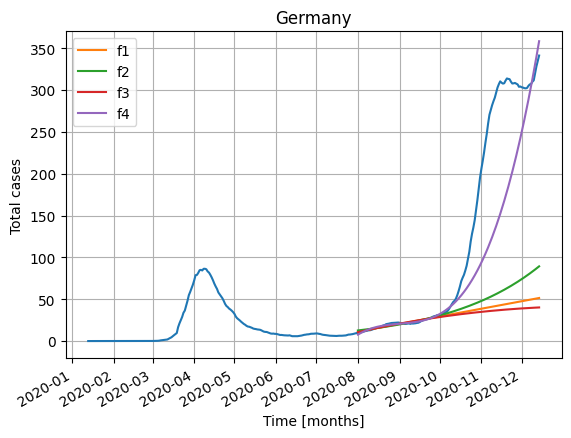

In [12]:
param_1, _ = scipy.optimize.curve_fit(fun_1, x_cases, y_cases)
param_2, _ = scipy.optimize.curve_fit(fun_2, x_cases, y_cases)  # fit fun_2
param_3, _ = scipy.optimize.curve_fit(fun_3, x_cases, y_cases)  # fit fun_3
param_4, _ = scipy.optimize.curve_fit(fun_4, x_cases, y_cases)  # fit fun_4

#raise NotImplementedError()
y_fit_1 = fun_1(x_test_days, *param_1)
y_fit_2 = fun_2(x_test_days, *param_2)  # evalute fit 2
y_fit_3 = fun_3(x_test_days, *param_3)  # evalute fit 3
y_fit_4 = fun_4(x_test_days, *param_4)  # evalute fit 4
# YOUR CODE HERE
#raise NotImplementedError()
fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.plot(x_test, y_fit_1, label="f1")  # plot data
ax.plot(x_test, y_fit_2, label="f2")  # plot data
ax.plot(x_test, y_fit_3, label="f3")  # plot data
ax.plot(x_test, y_fit_4, label="f4")  # plot data
# YOUR CODE HERE
#raise NotImplementedError()
ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.ylim([-20, 370])
plt.legend()
plt.title("Germany")
plt.ylabel("Total cases")
plt.xlabel("Time [months]")
plt.show()  # make plot

/auto-grading/.venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


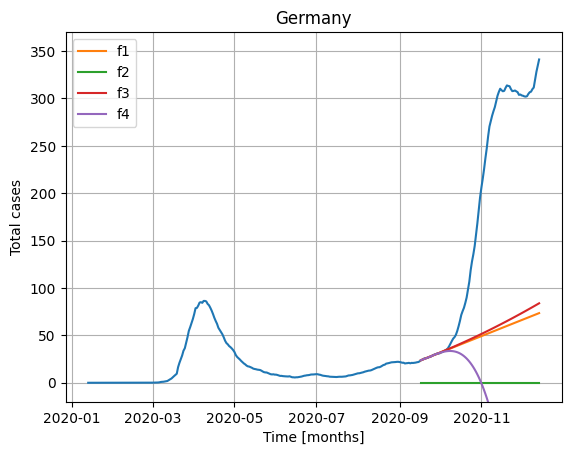

In [13]:
#fill Na of Y_cases_14
y_cases_14 = np.nan_to_num(y_cases_14)

param_1_14, _ = scipy.optimize.curve_fit(fun_1, x_cases_14, y_cases_14)
param_2_14, _ = scipy.optimize.curve_fit(fun_2, x_cases_14, y_cases_14)  # fit fun_2
param_3_14, _ = scipy.optimize.curve_fit(fun_3, x_cases_14, y_cases_14)  # fit fun_3
param_4_14, _ = scipy.optimize.curve_fit(fun_4, x_cases_14, y_cases_14)  # fit fun_4

#raise NotImplementedError()
y_fit_1_14 = fun_1(x_test_days_14, *param_1_14)
y_fit_2_14 = fun_2(x_test_days_14, *param_2_14)  # evalute fit 2
y_fit_3_14 = fun_3(x_test_days_14, *param_3_14)  # evalute fit 3
y_fit_4_14 = fun_4(x_test_days_14, *param_4_14)  # evalute fit 4
#raise NotImplementedError()
fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.plot(x_test_14, y_fit_1_14, label="f1")  # plot data
ax.plot(x_test_14, y_fit_2_14, label="f2")  # plot data
ax.plot(x_test_14, y_fit_3_14, label="f3")  # plot data
ax.plot(x_test_14, y_fit_4_14, label="f4")  # plot data
# YOUR CODE HERE
#raise NotImplementedError()
plt.grid(True, "both")
plt.ylim([-20, 370])
plt.legend()
plt.title("Germany")
plt.ylabel("Total cases")
plt.xlabel("Time [months]")
plt.show()  # make plot

Which function extrapolates best to the subsequent development starting
from 01.10.2020 to the end of the year? Can you quantify? Does this change
if you only fit to the last 14 days from 17.09.2020 to the 01.10.2020?
Which is the best function for 14 days extrapolation. Can you explain?

In [14]:
answer_best_fun = 4  # number of best function (int)
answer_change_14_days = True  # Does it change, answer with "True" or "False" (bool)
answer_best_fun_14_days = 3  # best function within 14 days fit (int)
answer_explanation = "With a smaller time window, the fitting is worse with as the exponential rise of the cc_cases is not shown in the last 14 days of august that folows in september."  # Answer as string in free text.
#raise NotImplementedError()

**1.1.4** Finally, let us also try some machine learning to fit the data.
You don't need to understand the code in detail, yet. We fit a small neural
network on the time series prediction. We will have the neural network train
on 14 previous days to predict the change of infections for the next day in
the time period between 01.08.2020 and 01.10.2020. And then to predict the
next days from 01.10.2020 onward. This is by far not a sophisticated model.
We will learn more methods in the lectures.

In [15]:
# Prepare and run training
step_size = 14
x_train = np.array(
    [y_cases[i:i + step_size]
     for i in range(len(x_cases) - step_size)]
)
y_train = np.array(
    [y_cases[step_size + i] - y_cases[step_size + i - 1]
     for i in range(len(x_cases) - step_size)]
)
nn = MLPRegressor(
    hidden_layer_sizes=(100, 100),
    random_state=1,
    max_iter=1000).fit(x_train, y_train)

# Predict the time-series
y_test = y_cases[-step_size:]
y_val = y_cases[:step_size]
days_to_predict = 30
for _ in range(days_to_predict):
    next_step = nn.predict(np.expand_dims(y_test[-step_size:], axis=0)) + y_test[-1]
    y_test = np.concatenate([y_test, next_step], axis=0)
    next_step = nn.predict(np.expand_dims(y_val[-step_size:], axis=0)) + y_val[-1]
    y_val = np.concatenate([y_val, next_step], axis=0)

# Make time values for y_val and y_test
x_test = np.arange(-step_size, days_to_predict) * np.timedelta64(1, "D") + np.datetime64(date_stop)
x_val = np.arange(0, days_to_predict + step_size) * np.timedelta64(1, "D") + np.datetime64(date_start)
x_val
#x_test

array(['2020-08-01T00:00:00.000000', '2020-08-02T00:00:00.000000',
       '2020-08-03T00:00:00.000000', '2020-08-04T00:00:00.000000',
       '2020-08-05T00:00:00.000000', '2020-08-06T00:00:00.000000',
       '2020-08-07T00:00:00.000000', '2020-08-08T00:00:00.000000',
       '2020-08-09T00:00:00.000000', '2020-08-10T00:00:00.000000',
       '2020-08-11T00:00:00.000000', '2020-08-12T00:00:00.000000',
       '2020-08-13T00:00:00.000000', '2020-08-14T00:00:00.000000',
       '2020-08-15T00:00:00.000000', '2020-08-16T00:00:00.000000',
       '2020-08-17T00:00:00.000000', '2020-08-18T00:00:00.000000',
       '2020-08-19T00:00:00.000000', '2020-08-20T00:00:00.000000',
       '2020-08-21T00:00:00.000000', '2020-08-22T00:00:00.000000',
       '2020-08-23T00:00:00.000000', '2020-08-24T00:00:00.000000',
       '2020-08-25T00:00:00.000000', '2020-08-26T00:00:00.000000',
       '2020-08-27T00:00:00.000000', '2020-08-28T00:00:00.000000',
       '2020-08-29T00:00:00.000000', '2020-08-30T00:00:00.0000

Plot the corona infections and evaluate the predictions for ``x_test``,
``x_val`` and ``y_test``, ``y_val`` with the ground truth. You can play around with the hyper-parameters (parameters not optimized in training but used to control the learning process) and see how the result changes. What are problems and how would you improve the Machine Learning model?

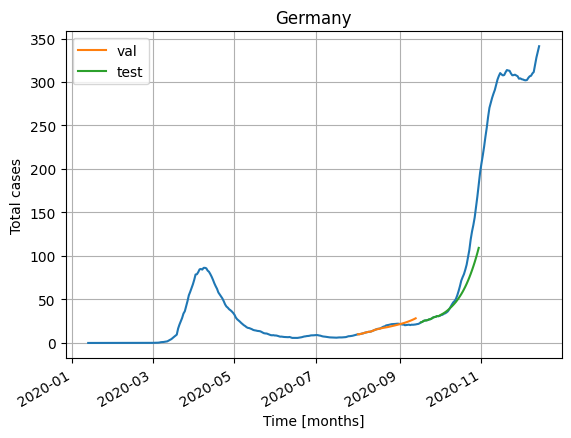

In [16]:
answer_nn = "One problem is that the validation data does not fit the ground truth, it seems like the model is not able to fit to the training data. The model could be imporved by using more data."
fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.plot(x_val, y_val, label='Validation')  # plot data
ax.plot(x_test, y_test, label='Test')  # plot data
fig.autofmt_xdate()
plt.grid(True, "both")
plt.legend()
plt.title("Germany Corona cases")
plt.ylabel("Total cases")
plt.xlabel("Time [months]")
plt.show()  # make plot

In [17]:
# Tests for auto-grading (check variables to be graded).
assert isinstance(countries, list) or isinstance(countries, np.ndarray)
assert isinstance(rel_deaths, dict)
assert isinstance(population, dict)
assert isinstance(deaths, dict)
assert isinstance(country_max_mortality, str)

In [18]:
assert isinstance(cum_death, np.ndarray)
assert isinstance(cum_cases, np.ndarray)

In [19]:
assert fun_1(0, 0, 0) == 0
assert fun_2(0, 0, 0, 0) == 0
assert fun_3(0, 0, 0, 0) == 0
assert fun_4(0, 0, 0, 0, 0) == 0

In [20]:
assert param_1 is not None
assert param_2 is not None
assert param_3 is not None
assert param_4 is not None
assert isinstance(answer_best_fun, int)
assert isinstance(answer_change_14_days, bool)
assert isinstance(answer_best_fun_14_days, int)
assert isinstance(answer_explanation, str)

In [21]:
assert isinstance(answer_nn, str)